In [37]:
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [53]:
def image_arrs(paths, im_arr):
    for path in paths:
        #read images, may need to change filepath
        image = cv2.imread('../GTSRB/'+path)
        image_from_array = Image.fromarray(image, 'RGB')
        #resize all images to 30x30
        size_image = image_from_array.resize((30, 30))
        #convert images to array
        image_arr = np.array(size_image.getdata(),
                        np.uint8).reshape(size_image.size[1], size_image.size[0], 3)
        im_arr.append(image_arr.flatten())
    return im_arr

In [54]:
#this may take a minute
df = pd.read_csv('../GTSRB/Train.csv')
#all filepaths for class 1 and 2
paths1 = df[(df['ClassId']==1)]['Path'].values
paths2 = df[(df['ClassId']==2)]['Path'].values

class1_arrs = []
class1_arrs = image_arrs(paths1, class1_arrs)

class2_arrs = []
class2_arrs = image_arrs(paths2, class2_arrs)

In [87]:
#load third, fourth and fifth class
paths3 = df[(df['ClassId']==3)]['Path'].values
class3_arrs = []
class3_arrs = image_arrs(paths3, class3_arrs)

paths4 = df[(df['ClassId']==4)]['Path'].values
class4_arrs = []
class4_arrs = image_arrs(paths4, class4_arrs)

paths5 = df[(df['ClassId']==5)]['Path'].values
class5_arrs = []
class5_arrs = image_arrs(paths5, class5_arrs)

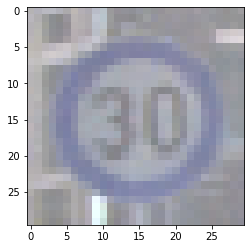

In [55]:
#class 1 images
plt.imshow(class1_arrs[0].reshape(30, 30, 3))

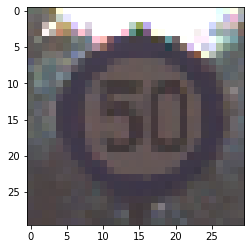

In [56]:
#class 2 images
plt.imshow(class2_arrs[50].reshape(30, 30, 3))

In [22]:
#concat data and labels 
X = class1_arrs + class2_arrs
y = len(class1_arrs)*[0] + len(class2_arrs)*[1]

In [23]:
#check data is the same length as labels
len(X)==len(y)

True

In [24]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
#train logreg model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#accuracy on test
model.score(X_train, y_train)

1.0

In [28]:
#accuracy on train
model.score(X_test, y_test)

0.9608501118568232

In [29]:
#train SVM mode
model = SVC()
model.fit(X_train, y_train)

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
#accuracy on train
model.score(X_train, y_train)

1.0

In [31]:
#accuracy on test
model.score(X_test, y_test)

0.5078299776286354

In [33]:
#train RFC
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
#accuracy on train
model.score(X_train, y_train)

0.9988814317673378

In [35]:
#accuracy on test
model.score(X_test, y_test)

0.9284116331096197

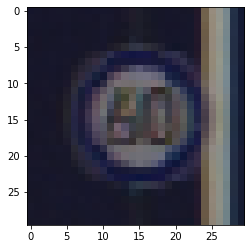

In [78]:
#class 3 images
plt.imshow(class3_arrs[100].reshape(30, 30, 3))

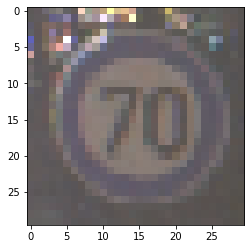

In [90]:
#class 4 images
plt.imshow(class4_arrs[50].reshape(30, 30, 3))

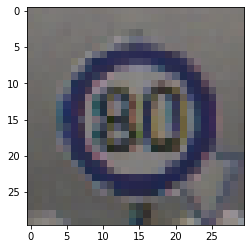

In [92]:
#class 5 images
plt.imshow(class5_arrs[20].reshape(30, 30, 3))

In [97]:
#concat data and labels 
X = class1_arrs + class2_arrs + class3_arrs + class4_arrs + class5_arrs
y = len(class1_arrs)*[0] + len(class2_arrs)*[1] + len(class3_arrs)*[2] + len(class4_arrs)*[3] + len(class5_arrs)*[4]

In [98]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
#train Logreg
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#accuracy on train
model.score(X_train, y_train)

1.0

In [101]:
#accuracy on test
model.score(X_test, y_test)

0.9120370370370371

In [106]:
#train RFC
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\aleja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
#accuracy on train
model.score(X_train, y_train)

0.9992283950617284

In [108]:
#accuracy on test
model.score(X_test, y_test)

0.8816872427983539